# Understanding Supervised Learning

_Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs_

![Image](../images/ml_map.jpg)

## Before we start:

- __Data exploration:__ 

Shape, Descriptive statistics (numeric, categorical, timestamp), Visualization, Domain knowledge 

- __Data transformations:__ 

Arbitrary, Modeling (joins, feature eng.), Performance (outliers, scaling, encoding)

![Image](https://media.giphy.com/media/ZThQqlxY5BXMc/giphy.gif)

In [1]:
# Imports

import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
# Read data

#Dos DS: uno líneal que se llama ok y otro que se llama ko que tiene más dispersión

file = '../data/baseball_100_ko.csv'
data = pd.read_csv(file)
data.head()

,time,distance,speed
0,0.437081,18.39,42.383559
1,0.481241,18.39,36.936933
2,0.494422,18.39,36.219848
3,0.492387,18.39,36.047181
4,0.485656,18.39,37.766258


In [3]:
# Shape

data.shape

(100, 3)

In [4]:
# Descriptive statistics

data.describe()

,time,distance,speed
count,100.000000,1.000000e+02,100.000000
mean,0.465342,1.839000e+01,39.214007
std,0.029483,3.927673e-14,2.489694
min,0.394851,1.839000e+01,35.889456
25%,0.443989,1.839000e+01,36.968824
50%,0.469555,1.839000e+01,38.771239
75%,0.490878,1.839000e+01,41.074887
max,0.517578,1.839000e+01,44.587241


'../data/baseball_100_ko.csv'

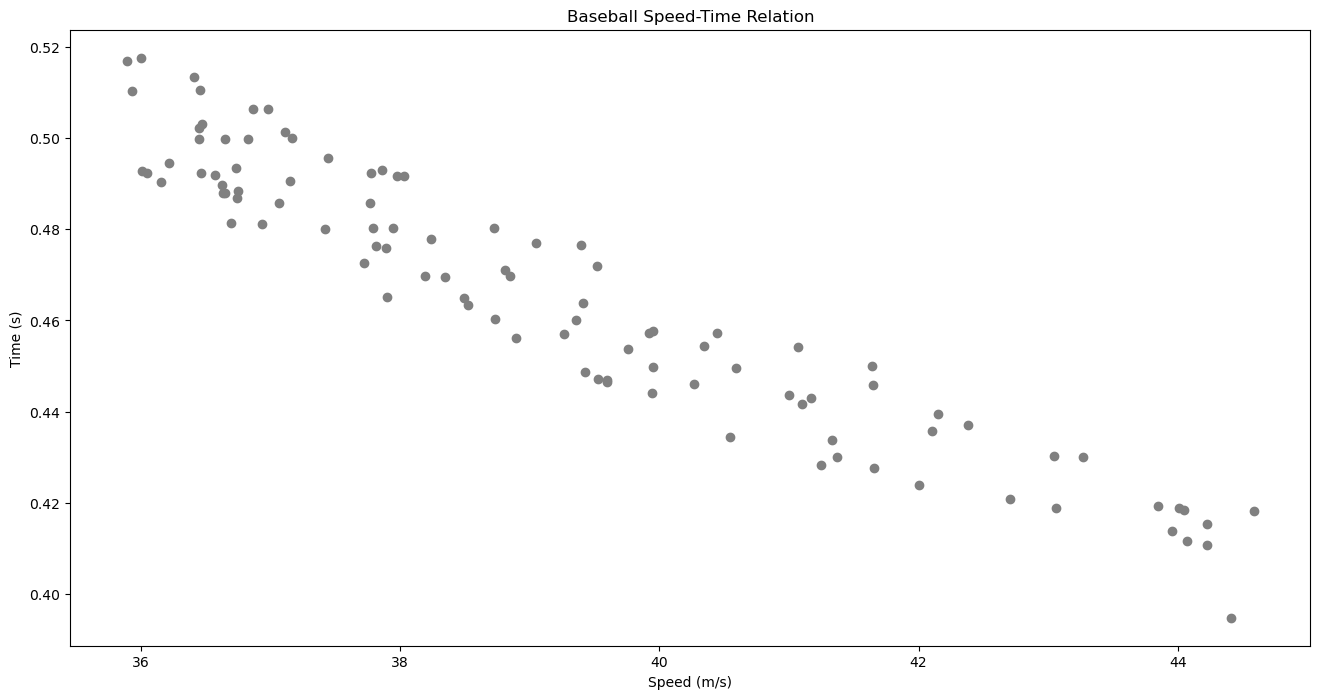

In [5]:
# Visualization

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,8))
ax.set(xlabel='Speed (m/s)', 
       ylabel='Time (s)',
       title='Baseball Speed-Time Relation')
ax.scatter(data['speed'], data['time'], c='grey')
file

### Domain knowledge

![Image](../images/velocity.png)

![Image](https://media.giphy.com/media/l0HlIJQUdby5FzlZe/giphy.gif)

In [6]:
# Features and predictions

X = data[['time','distance']]
y = data['speed']
print(X.shape,y.shape)

(100, 2) (100,)


In [7]:
X

,time,distance
0,0.437081,18.39
1,0.481241,18.39
2,0.494422,18.39
3,0.492387,18.39
4,0.485656,18.39
...,...,...
95,0.510366,18.39
96,0.413920,18.39
97,0.491887,18.39
98,0.499815,18.39


In [8]:
y

0     42.383559
1     36.936933
2     36.219848
3     36.047181
4     37.766258
        ...    
95    35.929371
96    43.952820
97    36.574612
98    36.822249
99    37.166186
Name: speed, Length: 100, dtype: float64

---

## Train-Test Split:

![Image](../images/train-test-split.jpg)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
print(f"X_train: {type(X_train)}, X_test: {type(X_test)}, y_train: {type(y_train)}, y_test: {type(y_test)}")

X_train: (80, 2), X_test: (20, 2), y_train: (80,), y_test: (20,)
X_train: <class 'pandas.core.frame.DataFrame'>, X_test: <class 'pandas.core.frame.DataFrame'>, y_train: <class 'pandas.core.series.Series'>, y_test: <class 'pandas.core.series.Series'>


In [10]:
X_train.describe()

,time,distance
count,80.000000,8.000000e+01
mean,0.465468,1.839000e+01
std,0.029695,2.145077e-14
min,0.394851,1.839000e+01
25%,0.443484,1.839000e+01
50%,0.470448,1.839000e+01
75%,0.490878,1.839000e+01
max,0.517578,1.839000e+01


In [12]:
y_train.describe()

count    80.000000
mean     39.167592
std       2.504797
min      35.889372
25%      36.917947
50%      38.771293
75%      41.074952
max      44.587299
Name: speed, dtype: float64

In [11]:
X_test.describe()

,time,distance
count,20.000000,2.000000e+01
mean,0.464838,1.839000e+01
std,0.029369,7.290015e-15
min,0.411563,1.839000e+01
25%,0.448059,1.839000e+01
50%,0.464497,1.839000e+01
75%,0.488380,1.839000e+01
max,0.506366,1.839000e+01


In [12]:
y_test.describe()

count    20.000000
mean     39.399694
std       2.483168
min      36.445477
25%      37.569557
50%      39.069034
75%      40.672489
max      44.074715
Name: speed, dtype: float64

---

## Models

![Image](../images/models.png)

### _Linear Regression (test-in-training)_ 

In [13]:
%%time
#test in training: meto todos los datos en el entrenamiento y veo cómo predice

# Model definition

model = LinearRegression()
print(type(model))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: total: 0 ns
Wall time: 0 ns


In [14]:
%%time

# Model training

weights = model.fit(X, y)
print(type(weights))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: total: 0 ns
Wall time: 16.9 ms


In [15]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: total: 0 ns
Wall time: 2 ms


In [16]:
# RMSE

tricky_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {tricky_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 0.68811 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


### _Linear Regression (the-real-stuff)_ 

In [17]:
%%time

# Model definition
#en los datos de entrenamiento no meto los datos de test. La correcta

model = LinearRegression()
print(type(model))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: total: 0 ns
Wall time: 0 ns


In [18]:
%%time

# Model training

weights = model.fit(X_train, y_train)
print(type(weights))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: total: 0 ns
Wall time: 3.99 ms


In [19]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: total: 0 ns
Wall time: 2 ms


In [20]:
# RMSE

real_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {real_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 0.69692 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


In [21]:
# RMSE comparison

print(f"The real_error is {round(real_error/tricky_error, 2)} times the tricky_error")

The real_error is 1.01 times the tricky_error


---

### _Random Forest Regressor (test-in-training)_ 

In [22]:
%%time

# Model definition

model = RandomForestRegressor()
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: total: 0 ns
Wall time: 0 ns


In [23]:
%%time

# Model training

weights = model.fit(X, y)
print(type(weights))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: total: 141 ms
Wall time: 151 ms


In [25]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: total: 0 ns
Wall time: 10.8 ms


In [24]:
# RMSE

tricky_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {tricky_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 0.69692 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


### _Random Forest Regressor (the-real-stuff)_ 

In [25]:
%%time

# Model definition

model = RandomForestRegressor()
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: total: 0 ns
Wall time: 0 ns


In [26]:
%%time

# Model training

weights = model.fit(X_train, y_train)
print(type(weights))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: total: 156 ms
Wall time: 168 ms


In [27]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: total: 0 ns
Wall time: 13.7 ms


In [28]:
# RMSE

real_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {real_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 0.78207 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


In [29]:
# RMSE comparison

print(f"The real_error is {round(real_error/tricky_error, 2)} times the tricky_error")

The real_error is 1.12 times the tricky_error


---